<a href="https://colab.research.google.com/github/zakarias00/synth_tabular_data_gen/blob/main/datasec_sync_datagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas sdv scikit-learn sdmetrics matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [ ]:
!pip install sdv

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from sdmetrics.reports.single_table import QualityReport

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset (download from UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]
df = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include="object").columns
print(categorical_cols)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders to reverse later

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [ ]:
# Preview processed data
print(df.head())

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              13              39       0  
2              40   

In [ ]:
# Create metadata (required for SDV)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

metadata_dict = metadata.to_dict()  # Convert to dict for later use

In [ ]:
# Initialize and fit the synthesizer model
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=1000)
print(synthetic_data.head())

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


   age  workclass  fnlwgt  education  education-num  marital-status  \
0   52          4  135338         10             13               2   
1   31          4   81494          4             10               0   
2   30          6  241494         14              6               2   
3   58          4  195300          9              9               2   
4   29          4  173156         13             10               4   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0          13             5     4    1           641             1   
1           5             4     1    1          1218             2   
2          10             0     4    0         13314           125   
3           6             0     4    0          8950             0   
4           7             0     4    1          6226             0   

   hours-per-week  native-country  income  
0              40              32       1  
1              43              41       0  
2              37   

In [ ]:
# Decode categorical variables back to original labels
for col in categorical_cols:
    synthetic_data[col] = label_encoders[col].inverse_transform(synthetic_data[col].round().astype(int))

# Save to CSV
synthetic_data.to_csv("synthetic_adult_income.csv", index=False)

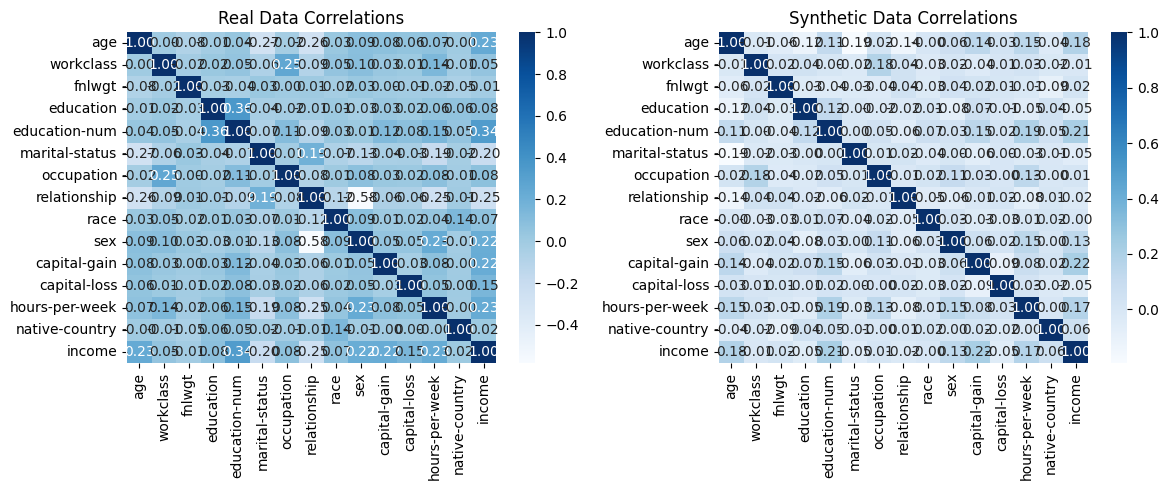

In [ ]:
# Plot correlation matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Real Data Correlations")

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Synthetic Data Correlations")

plt.tight_layout()
plt.show()

In [ ]:
# Generate a quality report (convert metadata to dict)
report = QualityReport()
report.generate(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata_dict  # Use the dictionary here
)

# Print the overall score
print(f"Overall Quality Score: {report.get_score():.2f}")

# Visualize column distributions
report.get_visualization(property_name='Column Shapes')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 15/15 [00:00<00:00, 53.87it/s]|
Column Shapes Score: 81.35%

(2/2) Evaluating Column Pair Trends: |██████████| 105/105 [00:01<00:00, 65.33it/s]|
Column Pair Trends Score: 78.06%

Overall Score (Average): 79.71%

Overall Quality Score: 0.80


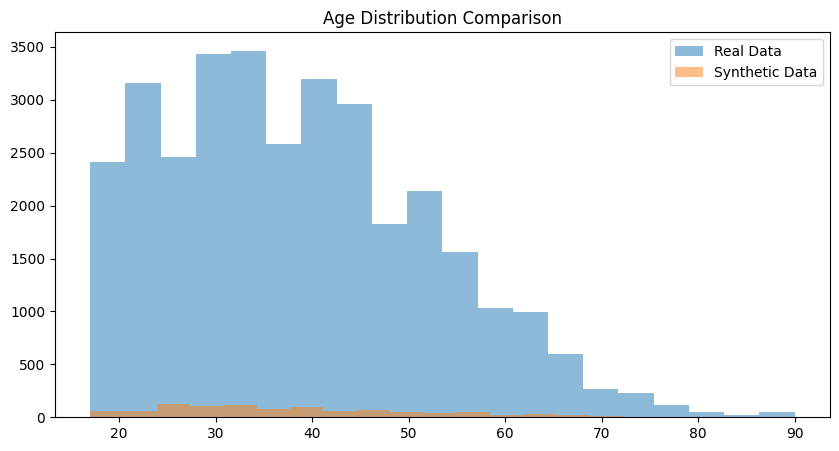

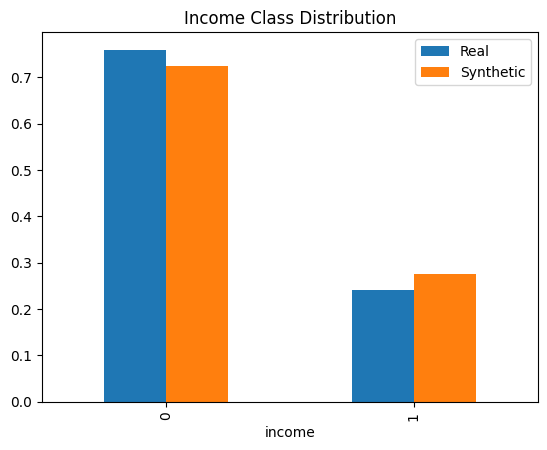

In [ ]:
# Compare age distribution
plt.figure(figsize=(10, 5))
plt.hist(df["age"], alpha=0.5, label="Real Data", bins=20)
plt.hist(synthetic_data["age"], alpha=0.5, label="Synthetic Data", bins=20)
plt.title("Age Distribution Comparison")
plt.legend()
plt.show()

# Compare income (target variable)
income_real = df["income"].value_counts(normalize=True)
income_synth = synthetic_data["income"].value_counts(normalize=True)
pd.DataFrame({"Real": income_real, "Synthetic": income_synth}).plot(kind="bar")
plt.title("Income Class Distribution")
plt.show()

In [ ]:
!pip install sdmetrics

In [ ]:
from sdmetrics.single_column import KSComplement

# Compare distributions for a numerical column (e.g., 'age')
ks_score = KSComplement.compute(
    df['age'],
    synthetic_data['age']
)
print(f"KS Test Score : {ks_score:.2f}")

KS Test Score : 0.96


In [ ]:
import sdmetrics
print(sdmetrics.__version__)


0.20.1


In [ ]:
from sdmetrics.privacy import NewRowSynthesis

# 3. Compute privacy score (lower = better privacy)
privacy_score = NewRowSynthesis.compute(
    real_data=df,  # Your original DataFrame
    synthetic_data=synthetic_data  # Generated data
)

print(f"Privacy Risk Score (0-1, lower is better): {privacy_score:.2f}")

ModuleNotFoundError: No module named 'sdmetrics.privacy'

In [ ]:
# Check if synthetic rows duplicate real rows
duplicates = synthetic_data.merge(df, how='inner')
print(f"Exact duplicates: {len(duplicates)} rows")

Exact duplicates: 0 rows


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare data (assuming 'income' is the target)
X_real = df.drop('income', axis=1)
y_real = df['income']
X_synth = synthetic_data.drop('income', axis=1)
y_synth = synthetic_data['income']

# Train on synthetic data, test on real data
model = RandomForestClassifier()
model.fit(X_synth, y_synth)
y_pred = model.predict(X_real)

# Evaluate
accuracy = accuracy_score(y_real, y_pred)
print(f"Model Accuracy on Real Data: {accuracy:.2f}")

Model Accuracy on Real Data: 0.77


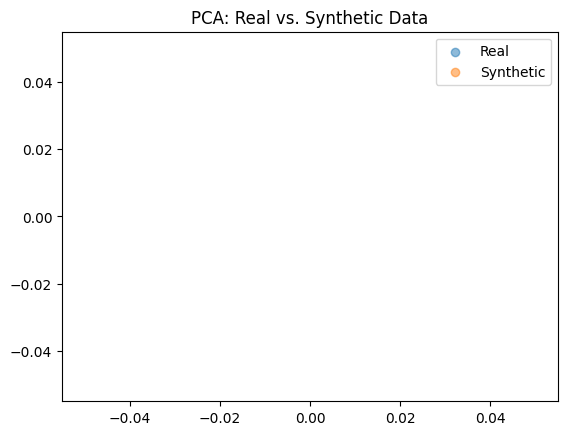

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Combine real and synthetic data
combined = pd.concat([df, synthetic_data])
labels = ['Real'] * len(df) + ['Synthetic'] * len(synthetic_data)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(combined.select_dtypes(include=np.number))

# Plot
plt.scatter(pca_results[labels == 'Real', 0], pca_results[labels == 'Real', 1], alpha=0.5, label='Real')
plt.scatter(pca_results[labels == 'Synthetic', 0], pca_results[labels == 'Synthetic', 1], alpha=0.5, label='Synthetic')
plt.legend()
plt.title("PCA: Real vs. Synthetic Data")
plt.show()

In [ ]:
from sdmetrics.reports.single_table import DiagnosticReport

diagnostic_report = DiagnosticReport()
diagnostic_report.generate(df, synthetic_data, metadata=metadata_dict)

# Check for common issues (e.g., overfitting)
print(diagnostic_report.get_properties())

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 15/15 [00:00<00:00, 204.54it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 222.56it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

         Property  Score
0   Data Validity    1.0
1  Data Structure    1.0
